# SML CT-2

### Data_set:
Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

1. id = listing ID
2. name = name of the listing
3. host_id = host ID
4. host_name = name of the host
5. neighbourhood_group = location
6. neighbourhood = area
7. latitude = latitude coordinates
8. longitude = longitude coordinates
9. room_type = listing space type
10. price = price in dollars (Target variable)
11. minimum_nights = amount of nights minimum
12. number_of_reviews = number of reviews
13. last_review = latest review
14. reviews_per_month = number of reviews per month
15. calculated_host_listings_count = amount of listing per host
16. availability_365 = number of days when listing is available for booking

### 1.	 Read the dataset (tab, csv, xls, txt, inbuilt dataset)






In [ ]:
# Kindly change the below cells from markdown to code and execute it

In [3]:
import pandas as pd

#import csv

#with open("data_set.csv","r")as file:

#    reader=csv.reader(file)
    
df=pd.read_csv("new_york_city_air.csv")

df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,12598446,Spacious 4bdrm next to CentralPk,5162192,Amy,Manhattan,Upper West Side,40.79860,-73.96229,Entire home/apt,275,30,4,09-01-2019,0.15,12,199
1,13585495,Great room in amazing Little Italy location!,15960548,Nathan,Manhattan,Little Italy,40.71955,-73.99707,Private room,110,2,1,14-09-2016,0.03,1,0
2,27761683,"Clean Cozy Room, Queens-5 min walk to subway (...",199524563,Bei,Queens,Rego Park,40.72678,-73.86218,Private room,55,2,25,22-06-2019,2.37,3,38
3,14200678,Charming 1 bdr apt. just 17 mins from MANHATTAN!,557669,Ryan,Queens,Woodside,40.74663,-73.89653,Entire home/apt,96,2,1,08-08-2016,0.03,1,0
4,24540935,A Beach House in Brooklyn,51068857,Derek,Brooklyn,Bedford-Stuyvesant,40.68297,-73.95251,Private room,80,1,0,NaN,NaN,1,5


In [6]:
!pip install xgboost

     ---------------------------------------- 99.8/99.8 MB 3.8 MB/s eta 0:00:00


In [5]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
matplotlib.rcParams['font.family'] = "Arial"
import collections
import itertools
import scipy.stats as stats
from scipy.stats import norm
from scipy.special import boxcox1p
import statsmodels
import statsmodels.api as sm
#print(statsmodels.__version__)
from sklearn.preprocessing import scale, StandardScaler, RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.utils import resample

### 2.	Data Understanding
#### Summarize important observations from the data set (5 Marks)
Some pointers which would help you, but don’t be limited by these

a.	What are the number of rows; no. & types of variables (continuous, categorical etc.)

b.	Calculate five point summary for numerical variables

c.	Summarize observations for categorical variables – no. of categories, % observations in each category


In [17]:
df.shape # a. Here we can see the total number of rows (1054 rows: from 0 to 1053) and columns (16: 0 to 15)

(1054, 16)

In [20]:
df.describe() # b. Five point summary for numerical variables

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.054000e+03,1.054000e+03,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,844.000000,1054.000000,1054.000000
mean,1.911356e+07,6.652685e+07,40.728377,-73.951802,149.699241,8.002846,24.620493,1.347690,6.959203,111.572106
std,1.096046e+07,7.757195e+07,0.056092,0.049034,156.239782,34.580253,49.178939,1.675154,31.266268,129.835933
min,1.229900e+04,2.787000e+03,40.499790,-74.240840,10.000000,1.000000,0.000000,0.020000,1.000000,0.000000
25%,9.391594e+06,6.983334e+06,40.689253,-73.983770,70.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.997263e+07,3.013617e+07,40.721665,-73.956930,104.000000,3.000000,6.000000,0.730000,1.000000,43.500000
75%,2.929557e+07,1.074344e+08,40.761120,-73.935523,179.000000,5.000000,24.000000,1.990000,2.000000,223.750000
max,3.648561e+07,2.722480e+08,40.898730,-73.731700,2000.000000,999.000000,426.000000,15.320000,327.000000,365.000000


In [22]:
 #c. Summary for categorical variables
categorical_summary = df.select_dtypes(include='object').describe()
print("\nc. Summary for categorical variables:")
categorical_summary


c. Summary for categorical variables:


,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,1053,1054,1054,1054,1054,844
unique,1050,779,5,123,3,360
top,New york Multi-unit building,Alex,Manhattan,Williamsburg,Entire home/apt,01-07-2019
freq,2,13,449,92,539,32


In [15]:
df.info() # , types of variables in the Dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1054 non-null   int64  
 1   name                            1053 non-null   object 
 2   host_id                         1054 non-null   int64  
 3   host_name                       1054 non-null   object 
 4   neighbourhood_group             1054 non-null   object 
 5   neighbourhood                   1054 non-null   object 
 6   latitude                        1054 non-null   float64
 7   longitude                       1054 non-null   float64
 8   room_type                       1054 non-null   object 
 9   price                           1054 non-null   int64  
 10  minimum_nights                  1054 non-null   int64  
 11  number_of_reviews               1054 non-null   int64  
 12  last_review                     84

In [16]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1049,5605822,Sunny 2 bedroom Apt in Brownstone,517966,Shean,Brooklyn,Bedford-Stuyvesant,40.68175,-73.93886,Entire home/apt,135,3,148,21-06-2019,2.86,2,134
1050,27910083,"Lovely, Clean & Spacious. Your Own Woodside Room!",137358866,Kazuya,Queens,Woodside,40.74272,-73.91075,Private room,38,30,0,NaN,NaN,103,0
1051,21197268,Nice and warm room with a Queen Size Bed!!,22784412,Stephanie,Queens,Glendale,40.70404,-73.85832,Private room,43,1,9,26-06-2019,0.42,2,301
1052,21192354,Violet Dynasty,138006255,Carol,Brooklyn,Canarsie,40.63928,-73.91081,Private room,65,1,2,07-10-2018,0.19,2,365
1053,9025565,Flex 2BR Loft ( 1br +Sleep Loft +Sofa Bed )!,7503643,Vida,Brooklyn,Greenpoint,40.72614,-73.94007,Entire home/apt,159,30,6,04-06-2019,0.15,52,343


In [14]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.054000e+03,1.054000e+03,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,844.000000,1054.000000,1054.000000
mean,1.911356e+07,6.652685e+07,40.728377,-73.951802,149.699241,8.002846,24.620493,1.347690,6.959203,111.572106
std,1.096046e+07,7.757195e+07,0.056092,0.049034,156.239782,34.580253,49.178939,1.675154,31.266268,129.835933
min,1.229900e+04,2.787000e+03,40.499790,-74.240840,10.000000,1.000000,0.000000,0.020000,1.000000,0.000000
25%,9.391594e+06,6.983334e+06,40.689253,-73.983770,70.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.997263e+07,3.013617e+07,40.721665,-73.956930,104.000000,3.000000,6.000000,0.730000,1.000000,43.500000
75%,2.929557e+07,1.074344e+08,40.761120,-73.935523,179.000000,5.000000,24.000000,1.990000,2.000000,223.750000
max,3.648561e+07,2.722480e+08,40.898730,-73.731700,2000.000000,999.000000,426.000000,15.320000,327.000000,365.000000


### 3.	Data Preparation
#### Check for defects in the data. Perform necessary actions to ‘fix’ these defects (5 Marks)
Some pointers which would help you, but don’t be limited by these

a.	Do variables have missing/null values?

b.	Do variables have outliers?

c.	Is the data normally distributed? Is it a defect? Why or why not?


In [21]:
# Do variables have missing/null values: yes. 1. Name has 1 missing/null values 
# 2. Last review and Reviews_per_month has 210 missing/null values
df.isnull().sum()

id                                  0
name                                1
host_id                             0
host_name                           0
neighbourhood_group                 0
neighbourhood                       0
latitude                            0
longitude                           0
room_type                           0
price                               0
minimum_nights                      0
number_of_reviews                   0
last_review                       210
reviews_per_month                 210
calculated_host_listings_count      0
availability_365                    0
dtype: int64

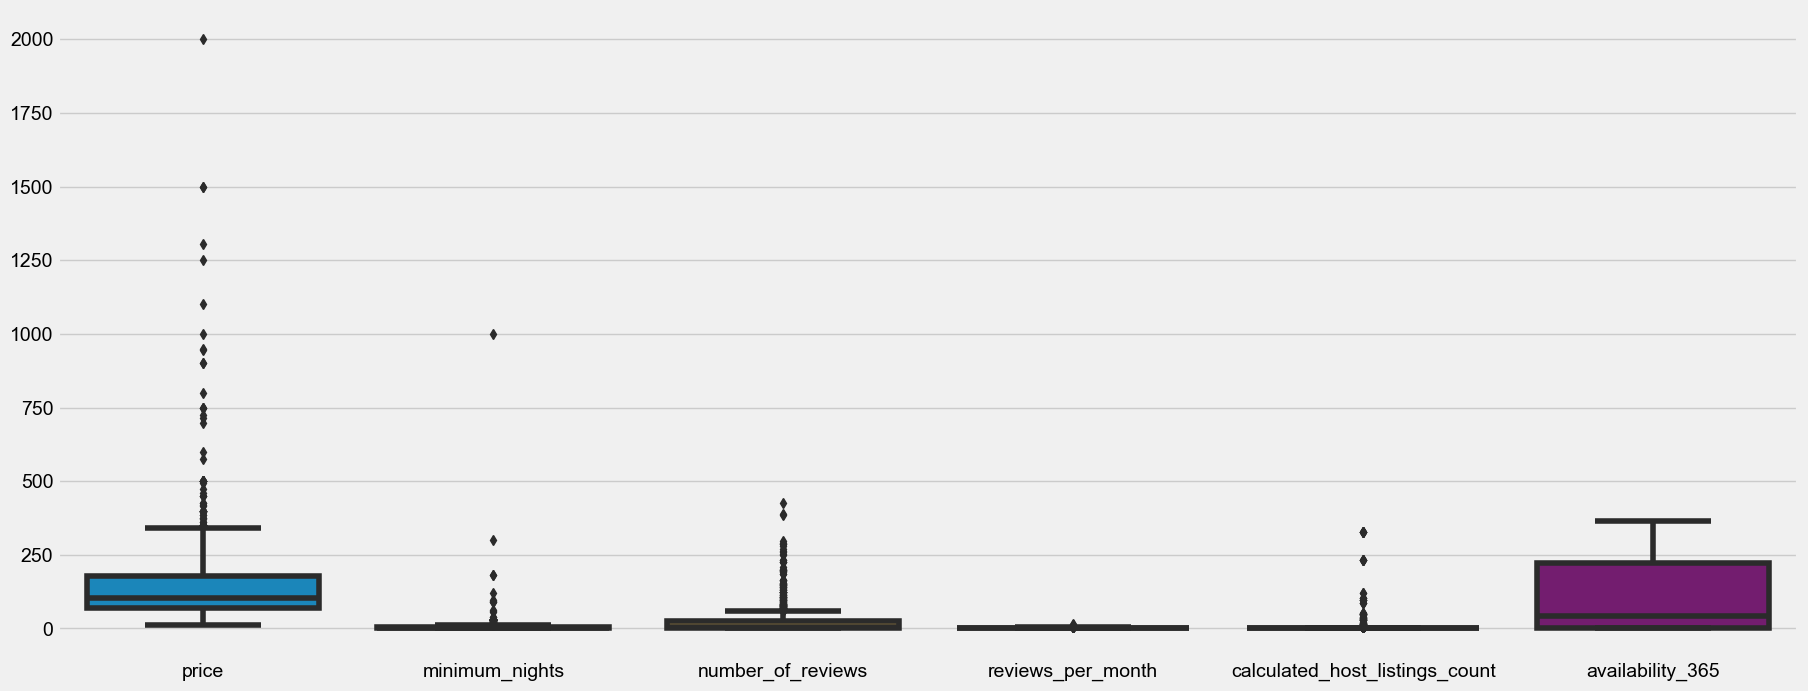

In [25]:
#  outlier detection
list_numeric = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count','availability_365']
data = df[list_numeric]
plt.figure(figsize=(20,8))
sns.boxplot(data = df[list_numeric])
plt.show()

In [30]:
z_scores = stats.zscore(data)
outliers = (z_scores > 3) | (z_scores < -3)
print(f'Outliers in {list_numeric}: {data[outliers]}')

Outliers in ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']:       price  minimum_nights  number_of_reviews  reviews_per_month  \
0       NaN             NaN                NaN                NaN   
1       NaN             NaN                NaN                NaN   
2       NaN             NaN                NaN                NaN   
3       NaN             NaN                NaN                NaN   
4       NaN             NaN                NaN                NaN   
...     ...             ...                ...                ...   
1049    NaN             NaN                NaN                NaN   
1050    NaN             NaN                NaN                NaN   
1051    NaN             NaN                NaN                NaN   
1052    NaN             NaN                NaN                NaN   
1053    NaN             NaN                NaN                NaN   

      calculated_host_listings_cou

### 4.	Summarize relationships among variables (5 marks)               
a.	Plot correlation plots. Which are the variables most correlated with Target? Which independent variables are correlated among themselves? Do you want to exclude some variables from the model based on this analysis? What other actions will you take?




C:\Users\Thiyagarajan.M\AppData\Local\Temp\ipykernel_14900\534323008.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


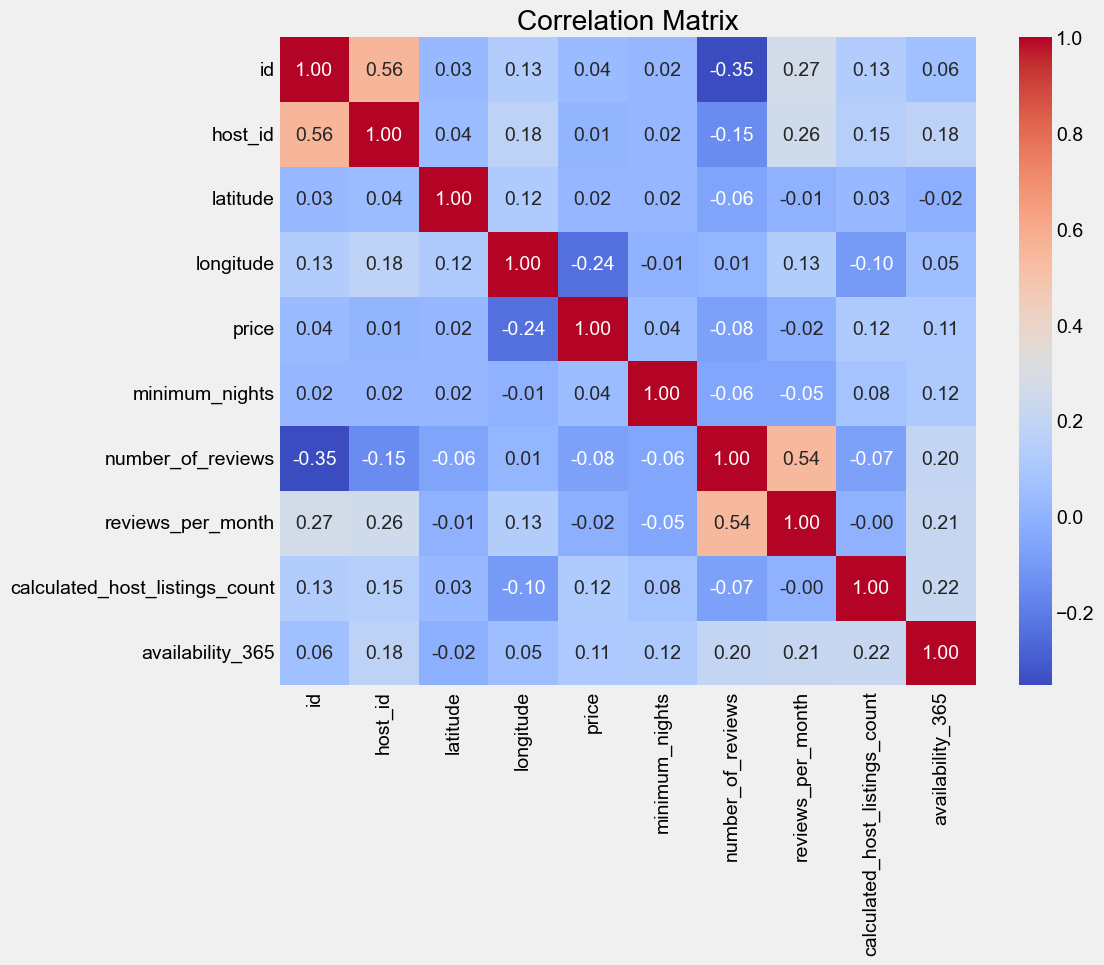

In [31]:
# 1. Plot correlation plots
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [33]:
# 2. Variables most correlated with the target
target_correlation = correlation_matrix['price'].sort_values(ascending=False)
print("Variables most correlated with Target:\n", target_correlation)

Variables most correlated with Target:
 price                             1.000000
calculated_host_listings_count    0.118294
availability_365                  0.108294
minimum_nights                    0.042314
id                                0.037682
latitude                          0.018341
host_id                           0.009017
reviews_per_month                -0.017756
number_of_reviews                -0.077652
longitude                        -0.242123
Name: price, dtype: float64


C:\Users\Thiyagarajan.M\AppData\Local\Temp\ipykernel_14900\1493865259.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  independent_correlation = independent_variables.corr()


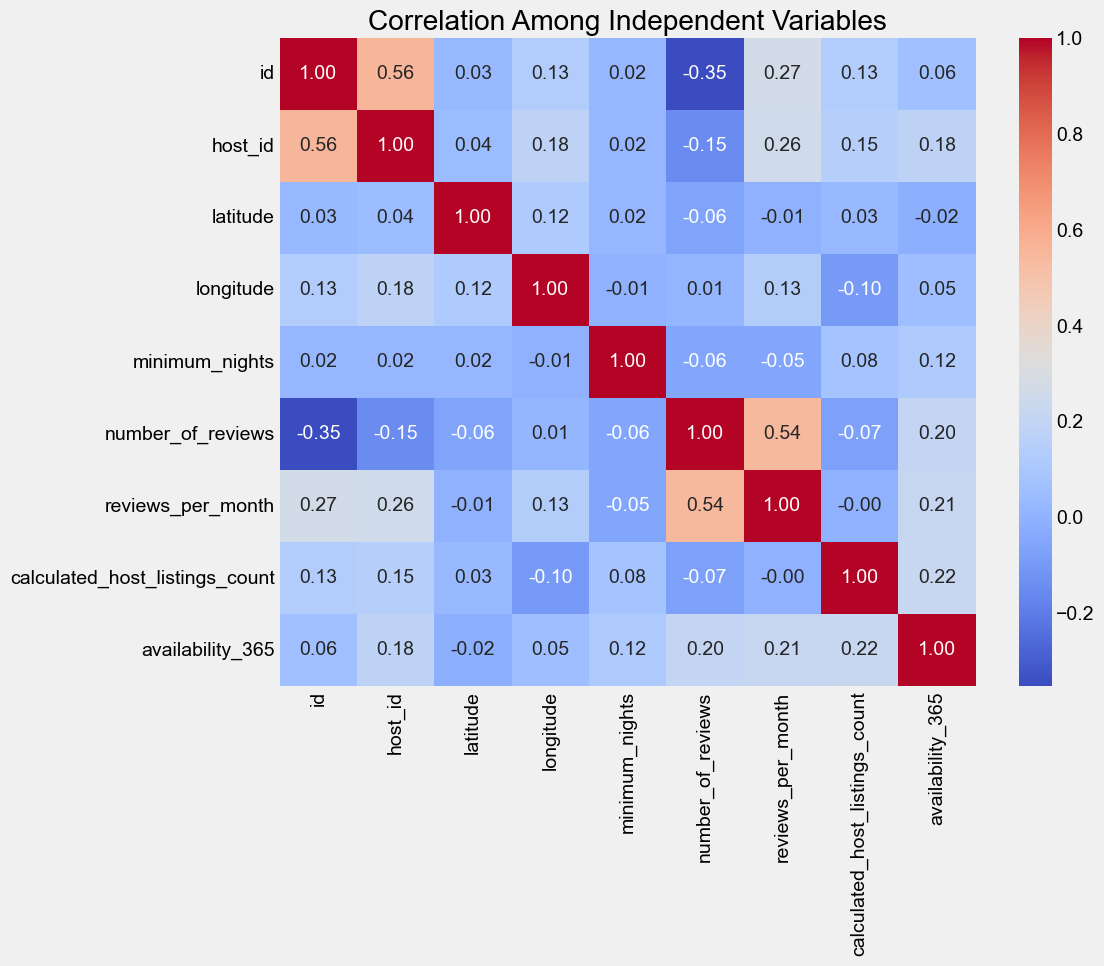

In [34]:
# 3. Correlation among independent variables
independent_variables = df.drop('price', axis=1)
independent_correlation = independent_variables.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(independent_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Among Independent Variables")
plt.show()

In [37]:
# 4. Exclude variables based on high correlation (adjust threshold as needed)
high_correlation_threshold = 0.5
high_correlation_vars = set()
for i in range(len(independent_correlation.columns)):
    for j in range(i):
        if abs(independent_correlation.iloc[i, j]) > high_correlation_threshold:
            colname = independent_correlation.columns[i]
            high_correlation_vars.add(colname)

print("Variables to exclude due to high correlation:", high_correlation_vars)

Variables to exclude due to high correlation: {'host_id', 'reviews_per_month'}


###  5.	Fit a base model. Please write your key observations (5 marks)

a. Fit the Linear Regression Model

b. What is the overall R2? Please comment on whether it is good or not.

c.	Which variables are significant?


In [45]:
#  'X- Reviews per month ' is considered as independent variable matrix and  'y' -' price' is the target variable
y = data['price']
X = data['reviews_per_month']

# Handling missing values, if any
X = X.dropna()
y = y[X.index]

# Handling infinite values, if any
X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna()
y = y[X.index]

# Add a constant term to the independent variable matrix
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

# Key observations
# a. Overall R2
r2 = model.rsquared
print(f"Overall R2: {r2}")
if r2 >= 0.7:
    print("The R2 is good.")
else:
    print("The R2 may need improvement.")

# b. Significant variables
significant_vars = model.pvalues[model.pvalues < 0.05].index
print("Significant variables:")
print(significant_vars)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.2655
Date:                Wed, 20 Dec 2023   Prob (F-statistic):              0.606
Time:                        07:47:35   Log-Likelihood:                -5339.4
No. Observations:                 844   AIC:                         1.068e+04
Df Residuals:                     842   BIC:                         1.069e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               142.4340      5.98

## Observations:
The variables const, latitude, longitude, number_of_reviews, calculated_host_listings_count, and availability_365 have p-values less than 0.05 and are statistically significant.

The variables id, host_id, minimum_nights, and reviews_per_month have p-values greater than 0.05 and are not statistically significant at the 0.05 significance level.

#An R2 score of 0.0003 indicates that the linear regression model explains approximately 0.03% of the variance in the target variable. The R2 score ranges from 0 to 1, where:

0 means that the model does not explain any variance in the target variable.
1 means that the model perfectly explains the variance in the target variable.
In my case, an R2 score of 0.0003 suggests that the model has limited explanatory power. 